In [1]:
from math import * 
import numpy as np
import matplotlib.pyplot as plt
import os



In [2]:
def gaussian(x, w, sigma):
    return exp(-(x - w)**2/(2*sigma**2))

def square(x):
    if sin(x) > 0:
        return 1
    else:
        return -1

class RBF:
    def __init__(self, input_dim, sigma=1):
        self.w = np.random.randn(input_dim)
        self.sigma = sigma
    
    def set_node(self, w, sigma):
        self.w = w
        self.sigma = sigma

    def forward(self, X):
        return np.array([gaussian(x, self.w, self.sigma) for x in X])

class RBFnetwork:
    def __init__(self, input_dim, nb_nodes, learning_rate):
        self.learning_rate = learning_rate
        self.rbfnodes = [RBF(input_dim) for _ in range(nb_nodes)]
        self.output_weights = np.random.randn(nb_nodes)
    
    def set_rbf_node(self, index, w, sigma):
        self.rbfnodes[index].set_node(w, sigma)

    def forward(self, x):
        out = 0
        for i, node in enumerate(self.rbfnodes):
            out += self.output_weights[i] * node.forward(x)
        return out

    def total_error(self, X, f):
        out = self.forward(X)
        return ((out - f)**2).sum()

    def least_square_error_function(self, phi, f):
        phi_T = phi.T
        w = np.linalg.inv(phi_T.dot(phi)).dot(phi_T).dot(f)
        return w
    
    #Performs one step of learning using the least square error function
    def learn_step(self, x_train, y_train):
        phi = np.array([node.forward(x_train) for node in self.rbfnodes]).T
        w = self.least_square_error_function(phi, y_train)
        self.output_weights = w

    #Performs nb_epochs steps of learning using the least square error function
    def batch_learn(self, x_train, y_train):
        self.learn_step(x_train, y_train)
        
    def predict(self, x_test):
        out = self.forward(x_test)
        return out

    def mse_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return ((out - y_test)**2).sum()
    
    def abs_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return np.abs(out - y_test).sum()
    
    def residual_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return np.abs(out - y_test).sum() / len(x_test)
    


In [3]:
sin_fun = np.vectorize(sin)
square_fun = np.vectorize(square)

x_train = np.arange(0, 2*pi, 0.1)
x_test = np.arange(0.05, 2*pi, 0.1)

training_sin = sin_fun(2 * x_train)
training_square = square_fun(2 * x_train)

test_sin = sin_fun(2 * x_test)
test_square = square_fun(2*x_test)

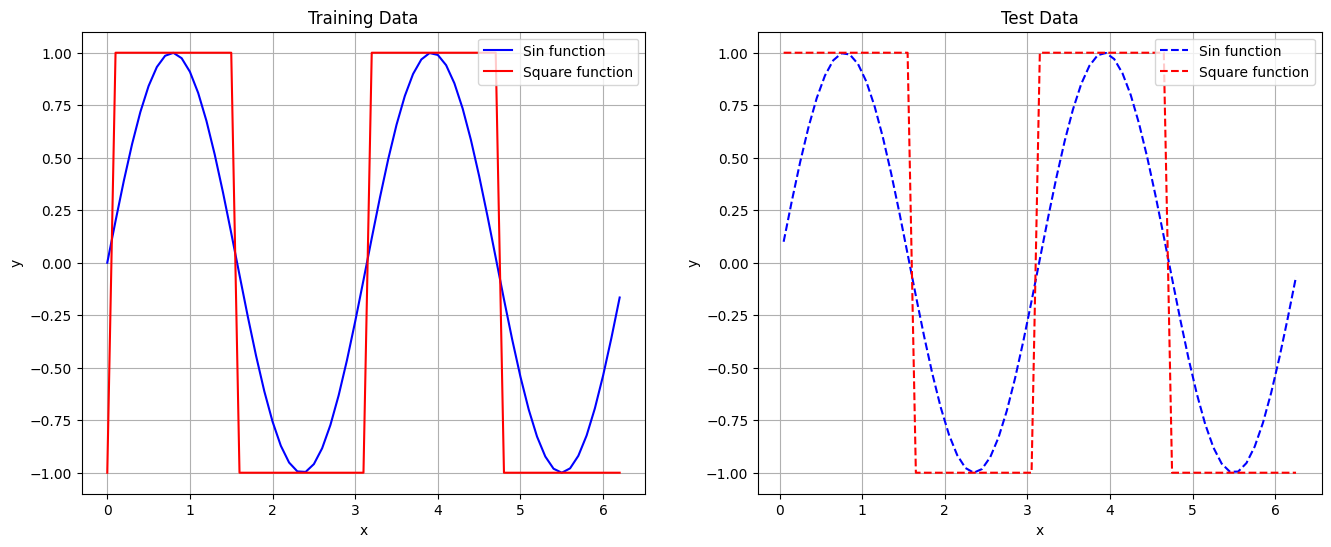

In [4]:
#Plot data
# Create a figure with two subplots
plt.figure(figsize=(16, 6))

# Plot Training Data
plt.subplot(1, 2, 1)
plt.plot(x_train, training_sin, label='Sin function', color='blue')
plt.plot(x_train, training_square, label='Square function', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data')
plt.legend(loc='upper right')
plt.grid(True)

# Plot Test Data
plt.subplot(1, 2, 2)
plt.plot(x_test, test_sin, label='Sin function', linestyle='--', color='blue')
plt.plot(x_test, test_square, label='Square function', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data')
plt.legend( loc='upper right')
plt.grid(True)

# plt.tight_layout()  # Ensures the subplots don't overlap

plt.show()

### 3.1 Batch mode training using least squares - supervised learning of network weights

Nodes: 010 | Error on sin: 0.53497163303697292669


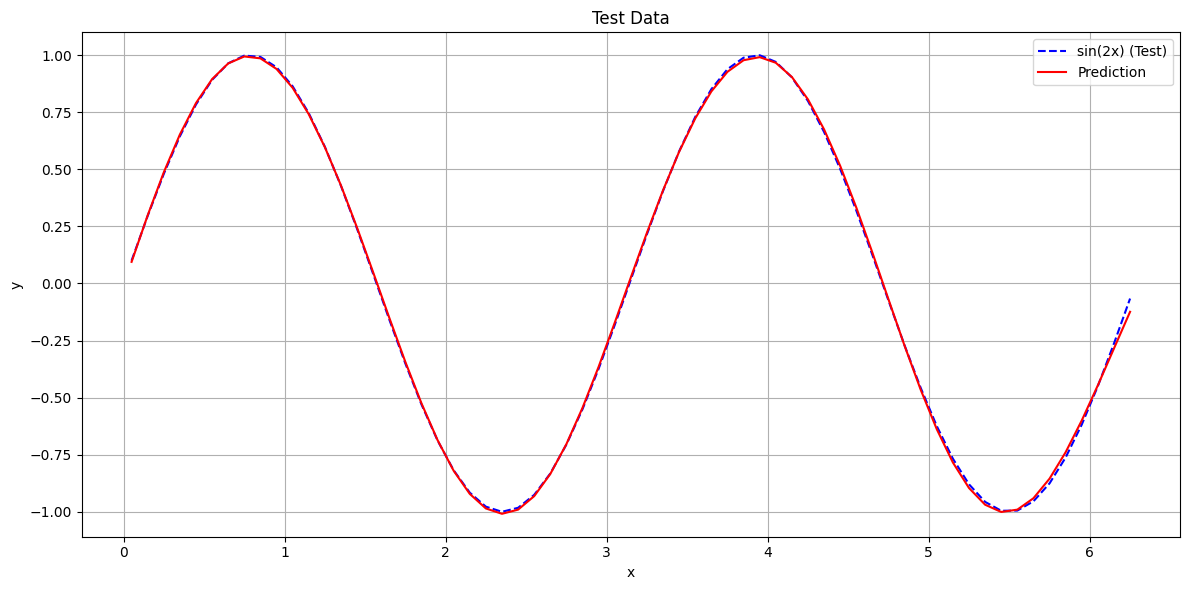

In [5]:
lr = 0.01
nb_nodes = 10
sigma = 1

network_sin = RBFnetwork(1, nb_nodes, lr)

# Place by hand the rbf nodes
# A good first approach is to divide the interval uniformally
# And use a fixed sigma
for i in range(nb_nodes):
    w = np.array(2*i*pi/nb_nodes)
    network_sin.set_rbf_node(i, w, sigma)

# Another good idea is to put more values at defining points of the curve

network_sin.batch_learn(x_train, training_sin)

abs_error = network_sin.abs_evaluate(x_test, test_sin)
print(f"Nodes: {nb_nodes:03} | Error on sin: {abs_error:.20f}")

pred = network_sin.predict(x_test)

plt.figure(figsize=(12, 6))
plt.plot(x_test, test_sin, label='sin(2x) (Test)', linestyle='--', color='blue')
plt.plot(x_test, pred, label='Prediction', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ensures the subplots don't overlap

plt.show()


Nodes: 001 | Error on sin: 0.63294898633026663859


<Figure size 600x300 with 0 Axes>

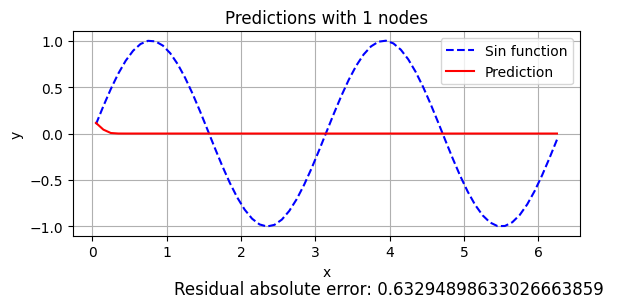

Nodes: 002 | Error on sin: 0.63294898641106189796


<Figure size 600x300 with 0 Axes>

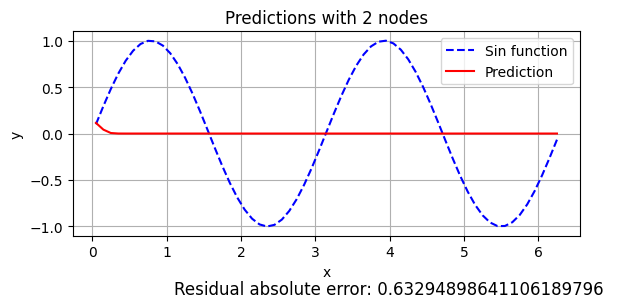

Nodes: 004 | Error on sin: 0.63294898655591624870


<Figure size 600x300 with 0 Axes>

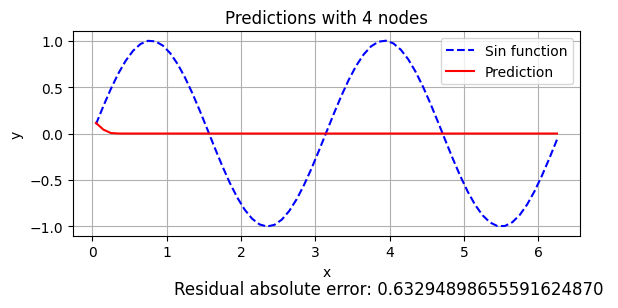

Nodes: 006 | Error on sin: 0.48943641985457209120


<Figure size 600x300 with 0 Axes>

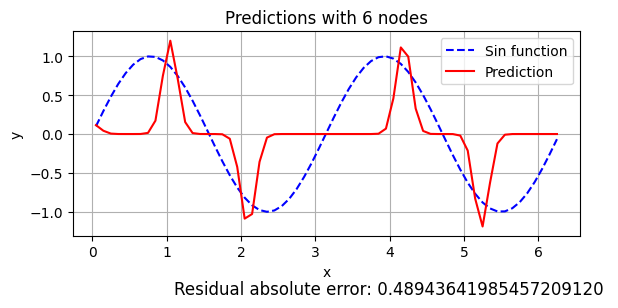

Nodes: 008 | Error on sin: 0.46538772315902132704


<Figure size 600x300 with 0 Axes>

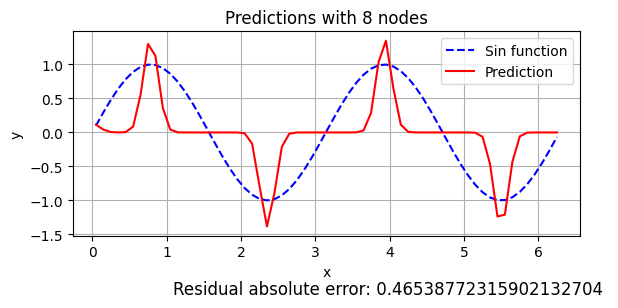

Nodes: 010 | Error on sin: 0.37828124626554143761


<Figure size 600x300 with 0 Axes>

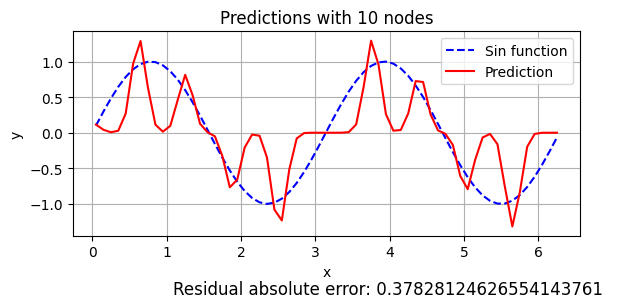

Nodes: 012 | Error on sin: 0.34358220097582586883


<Figure size 600x300 with 0 Axes>

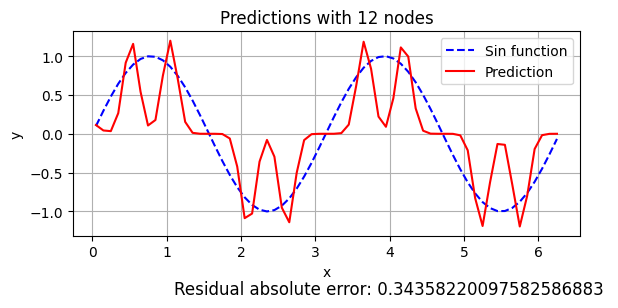

Nodes: 014 | Error on sin: 0.27852038337537210477


<Figure size 600x300 with 0 Axes>

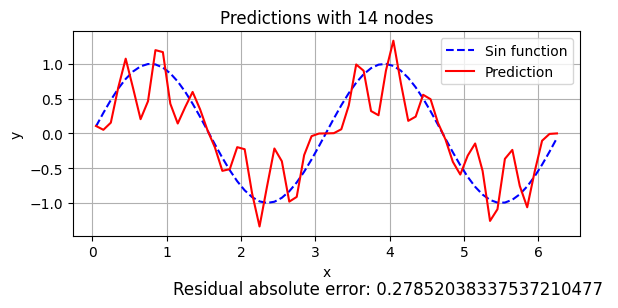

Nodes: 015 | Error on sin: 0.25962617234158252844


<Figure size 600x300 with 0 Axes>

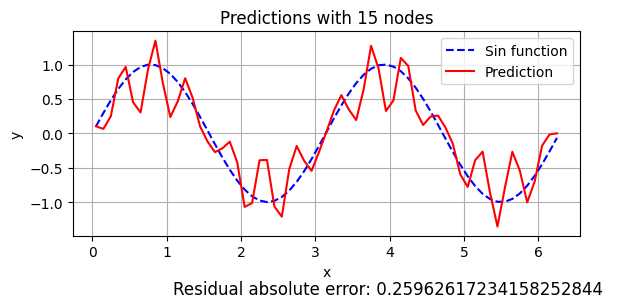

Nodes: 016 | Error on sin: 0.23193433494591361721


<Figure size 600x300 with 0 Axes>

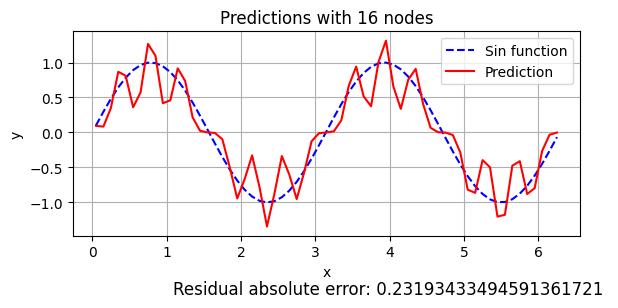

Nodes: 018 | Error on sin: 0.17725686533202453243


<Figure size 600x300 with 0 Axes>

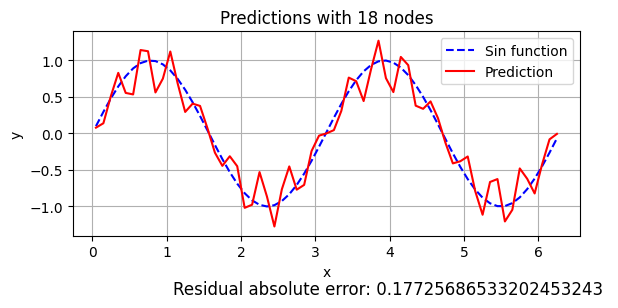

Nodes: 020 | Error on sin: 0.12979372870081021252


<Figure size 600x300 with 0 Axes>

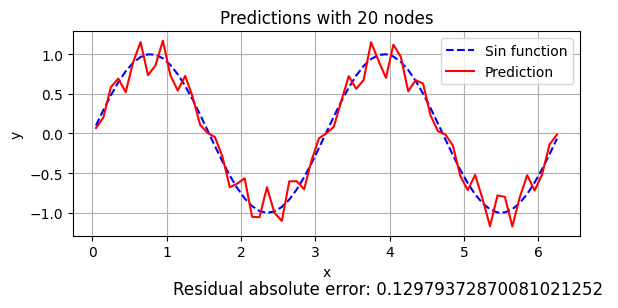

Nodes: 040 | Error on sin: 0.00159034510964331196


<Figure size 600x300 with 0 Axes>

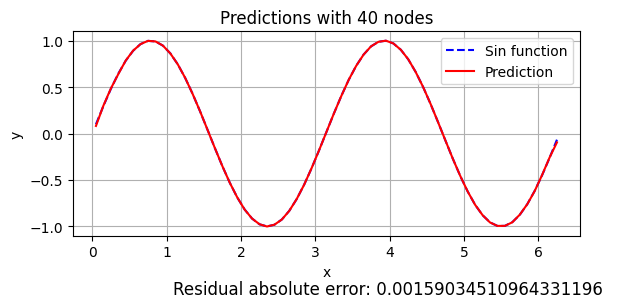

In [13]:
lr = 0.01
nb_nodes = [1, 2, 4, 6, 8, 10, 12, 14, 15, 16, 18, 20, 40]
sigma = 0.1

def plot_results(test_data, pred, func_name, nb_nodes, resi):
    fig = plt.figure(figsize=(6, 3))    

    plt.plot(x_test, test_data, label=f'{func_name} function', linestyle='--', color='blue')
    plt.plot(x_test, pred, label='Prediction', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Predictions with ' + str(nb_nodes) + ' nodes')
    fig.text(0.66, 0.0002, f'Residual absolute error: {resi:.20f} ', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensures the subplots don't overlap

    plt.show()

#Experiment using sin function
for nb in nb_nodes:

    network_sin = RBFnetwork(1, nb, lr)

    # Place by hand the rbf nodes
    # A good first approach is to divide the interval uniformally
    # And use a fixed sigma
    for i in range(nb):
        w = np.array(2*i*pi/nb)
        network_sin.set_rbf_node(i, w, sigma)

    # Another good idea is to put more values at defining points of the curve

    network_sin.batch_learn(x_train, training_sin)

    resi_sin = network_sin.residual_evaluate(x_test, test_sin)
    print(f"Nodes: {nb:03} | Error on sin: {resi_sin:.20f}")

    pred = network_sin.predict(x_test)
    
    fig = plt.figure(figsize=(6, 3))

    plot_results(test_sin, pred, 'Sin', nb, resi_sin)
    

Nodes: 015 | Error on square: 0.21291352307271080302


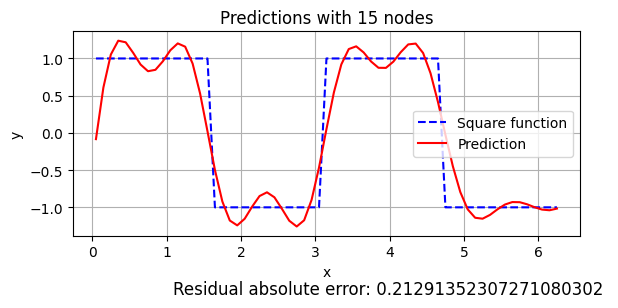

In [30]:
lr = 0.1
nb_nodes = [15]
sigma = 0.6

def plot_results(test_data, pred, func_name, nb_nodes, resi):
    fig = plt.figure(figsize=(6, 3))    

    plt.plot(x_test, test_data, label=f'{func_name} function', linestyle='--', color='blue')
    plt.plot(x_test, pred, label='Prediction', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Predictions with ' + str(nb_nodes) + ' nodes')
    fig.text(0.66, 0.0002, f'Residual absolute error: {resi:.20f} ', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensures the subplots don't overlap

    plt.show()

#Experiment using square function
for nb in nb_nodes:

    network_sq = RBFnetwork(1, nb, lr)

    # Place by hand the rbf nodes
    # A good first approach is to divide the interval uniformally
    # And use a fixed sigma
    #   -This idea is the same as generating gaussian noise 

    # for i in range(nb):
    #     noise = np.random.normal(3, 3, 1)
    #     w = np.array( noise)
    #     network_sq.set_rbf_node(i, w, sigma)
    
    for i in range(nb):
        w = np.array(2*i*pi/nb)
        network_sq.set_rbf_node(i, w, sigma)

    # Another good idea is to put more values at defining points of the curve

    network_sq.batch_learn(x_train, training_square)

    resi_sq = network_sq.residual_evaluate(x_test, test_square)
    print(f"Nodes: {nb:03} | Error on square: {resi_sq:.20f}")

    pred = network_sq.predict(x_test)
    
    plot_results(test_square, pred, 'Square', nb, resi_sq)

### 3.2 Regression with noise

In [ ]:
# sin_fun = np.vectorize(sin)
# square_fun = np.vectorize(square)

x_train = np.arange(0, 2*pi, 0.1)
x_test = np.arange(0.05, 2*pi, 0.1)

training_sin = sin_fun(2 * x_train)
training_square = square_fun(2 * x_train)

test_sin = sin_fun(2 * x_test)
test_square = square_fun(2*x_test)

# Add noise on inputs
x_train_noise = np.copy() # TODO

### 3.3 Competitive learning (CL) to initialise RBF units

In [72]:
lr = 0.1
nb_nodes = [i for i in range(1, 30)]
sigma = 0.6
nb_iter_cl = 20000

def plot_results(test_data, pred, func_name, nb_nodes, resi):
    fig = plt.figure(figsize=(6, 3))    

    plt.plot(x_test, test_data, label=f'{func_name} function', linestyle='--', color='blue')
    plt.plot(x_test, pred, label='Prediction', color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Predictions with ' + str(nb_nodes) + ' nodes')
    fig.text(0.66, 0.0002, f'Residual absolute error: {resi:.20f} ', fontsize=12, ha='center')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensures the subplots don't overlap

    plt.show()

# Randomly place the rbf vectors
# Apply the simple CL rule

def WTA(rbnetwork, x, learning_rate):
    winner = None
    distance = -1
    for node in rbnetwork.rbfnodes:
        d = abs(x-node.w)
        if winner is None:
            winner = node
            distance = d
        else:
            if distance > d:
                winner = node
                distance = d
    winner.w += learning_rate * (x-winner.w)

def leaky_learning(rbnetwork, x, learning_rate, p):
    winner = None
    distance = -1
    for node in rbnetwork.rbfnodes:
        d = abs(x-node.w)
        if winner is None:
            winner = node
            distance = d
        else:
            if distance > d:
                winner = node
                distance = d
    leak = np.random.binomial(1, p) > 0
    if leak:
        for node in rbnetwork.rbfnodes:
            node.w += learning_rate * (x-winner.w)
    else: 
        winner.w += learning_rate * (x-winner.w)


winner = list()
value = list()

for _ in range(1000):

    world_record = 1
    wr_nb_nodes = 0
    wr_method = None

    best_old = 1
    best_WTA = 1
    best_old_node = 0
    best_WTA_node = 0


#Experiment using square function
    for nb in nb_nodes:

        network_sin1 = RBFnetwork(1, nb, lr)
        network_sin2 = RBFnetwork(1, nb, lr)

        # Place by hand the rbf nodes
        # A good first approach is to divide the interval uniformally
        # And use a fixed sigma
        #   -This idea is the same as generating gaussian noise 
        for i in range(nb):
            w = np.array(2*i*pi/nb)
            network_sin1.set_rbf_node(i, w, sigma)
        
        # HERE we place nodes in the interval [0;2pi] with uniform probability
        for i in range(nb):
            w = np.random.uniform(0, 2*pi)
            network_sin2.set_rbf_node(i, w, sigma)

        # Competitive learning for seconde one
        random_x = np.random.choice(x_train, nb_iter_cl)
        for x in random_x:
            WTA(network_sin2, x, lr)

        # Another good idea is to put more values at defining points of the curve

        network_sin1.batch_learn(x_train, training_sin)
        network_sin2.batch_learn(x_train, training_sin)

        resi_sin1 = network_sin1.residual_evaluate(x_test, test_sin)
        resi_sin2 = network_sin2.residual_evaluate(x_test, test_sin)

        if resi_sin1 < world_record:
            world_record = resi_sin1
            wr_nb_nodes = nb
            wr_method = "leaky ihih"
        if resi_sin2 < world_record:
            world_record = resi_sin2
            wr_nb_nodes = nb
            wr_method = "WTA like a boss"

        if resi_sin1 < best_old:
            best_old = resi_sin1
            best_old_node = nb

        if resi_sin2 < best_WTA:
            best_WTA = resi_sin2
            best_WTA_node = nb

        # print(f"Nodes: {nb:03} | Error on manually placed: {resi_sin1:.5f}")
        # print(f"Nodes: {nb:03} | Error on WTA placement: {resi_sin2:.5f}")

        # pred1 = network_sin1.predict(x_test)
        # pred2 = network_sin2.predict(x_test)
        # print()
        # winner = "Manually old good way eheh" if resi_sin1<resi_sin2 else "WTA like a boss"
        # print(f"AND THE WINNER IIIIIS : {winner}")
        # print()
        
        # plot_results(test_sin, pred1, 'sin', nb, resi_sin1)
        # plot_results(test_sin, pred2, 'sin', nb, resi_sin2)

    print()
    print(f"LE WR IS {world_record}, WITH {wr_nb_nodes} nodes, AND THE CHAMPION IIIIIS : {wr_method}")
    print()
    print(f"FOR OLD METHOD BEST IS {best_old} with {best_old_node} nodes!")
    print()
    print(f"FOR WTA METHOD BEST IS {best_WTA} with {best_WTA_node} nodes!")

    winner.append(1 if wr_method=="WTA like a boss" else 0)
    value.append(world_record)
from statistics import mean
print(f"mean value {mean(value)}")
print(mean(winner))


LE WR IS 0.0004469254601261928, WITH 20 nodes, AND THE CHAMPION IIIIIS : leaky ihih

FOR OLD METHOD BEST IS 0.0004469254601261928 with 20 nodes!

FOR WTA METHOD BEST IS 0.0006323072078550264 with 22 nodes!

LE WR IS 0.0004469254601261928, WITH 20 nodes, AND THE CHAMPION IIIIIS : leaky ihih

FOR OLD METHOD BEST IS 0.0004469254601261928 with 20 nodes!

FOR WTA METHOD BEST IS 0.0005651361630644911 with 19 nodes!

LE WR IS 0.0001321391258684145, WITH 21 nodes, AND THE CHAMPION IIIIIS : WTA like a boss

FOR OLD METHOD BEST IS 0.0004469254601261928 with 20 nodes!

FOR WTA METHOD BEST IS 0.0001321391258684145 with 21 nodes!

LE WR IS 0.0003127800431695095, WITH 20 nodes, AND THE CHAMPION IIIIIS : WTA like a boss

FOR OLD METHOD BEST IS 0.0004469254601261928 with 20 nodes!

FOR WTA METHOD BEST IS 0.0003127800431695095 with 20 nodes!

LE WR IS 0.0001379699457148942, WITH 21 nodes, AND THE CHAMPION IIIIIS : WTA like a boss

FOR OLD METHOD BEST IS 0.0004469254601261928 with 20 nodes!

FOR WTA ME

In [ ]:
# Comparaison avec leaky...


#### Approximation of a 2D gaussian function

In [44]:
data_train = np.genfromtxt('data_lab2/ballist.dat',
                     dtype=None,
                     delimiter=',')

data_test = np.genfromtxt('data_lab2/balltest.dat',
                     dtype=None,
                     delimiter=',')

/tmp/ipykernel_28325/2626777770.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data_train = np.genfromtxt('data_lab2/ballist.dat',
/tmp/ipykernel_28325/2626777770.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data_test = np.genfromtxt('data_lab2/balltest.dat',


In [46]:
ballist_input = list()
ballist_output = list()

for d in data_train:
    ind, outd = d.split(b'\t')
    ballist_input.append(ind.split(b' '))
    ballist_output.append(outd.split(b' '))
ballist_input = np.array(ballist_input, dtype=float)
ballist_output = np.array(ballist_output, dtype=float)


balltest_input = list()
balltest_output = list()

for d in data_test:
    ind, outd = d.split(b'\t')
    balltest_input.append(ind.split(b' '))
    balltest_output.append(outd.split(b' '))
balltest_input = np.array(balltest_input, dtype=float)
balltest_output = np.array(balltest_output, dtype=float)


In [57]:
import warnings

def gaussian(x, w, sigma):
    return np.exp(-np.linalg.norm(x-w)/(2*sigma**2))

class RBF:
    def __init__(self, input_dim, sigma=1):
        self.w = np.random.randn(input_dim)
        self.sigma = sigma
    
    def set_node(self, w, sigma):
        self.w = w
        self.sigma = sigma

    def forward_single(self, x):
        return gaussian(x, self.w, self.sigma)

    def forward(self, X):
        return np.array([gaussian(x, self.w, self.sigma) for x in X])

def leaky_learning(rbnetwork, x, learning_rate, p):
    winner = None
    distance = -1
    for node in rbnetwork.rbfnodes:
        d = np.linalg.norm(x-node.w)
        if winner is None:
            winner = node
            distance = d
        else:
            if distance > d:
                winner = node
                distance = d
    leak = np.random.binomial(1, p) > 0
    if leak:
        for node in rbnetwork.rbfnodes:
            node.w += learning_rate * (x-winner.w)
    else: 
        winner.w += learning_rate * (x-winner.w)


class RBFnetworkExtend:
    def __init__(self, input_dim, output_dim, nb_nodes, learning_rate):
        self.learning_rate = learning_rate
        self.output_dim = output_dim
        self.rbfnodes = [RBF(input_dim) for _ in range(nb_nodes)]
        self.output_weights = [np.random.randn(nb_nodes)] * output_dim
        self.convergence_error = []

    def set_rbf_node(self, index, w, sigma):
        self.rbfnodes[index].set_node(w, sigma)

    def forward(self, x):
        out = [0] * self.output_dim
        for i, node in enumerate(self.rbfnodes):
            for j in range(self.output_dim):
                out[j] += self.output_weights[j][i] * node.forward(x)
        return out

    def total_error(self, X, f):
        out = self.forward(X)
        return ((out - f)**2).sum()

    def least_square_error_function(self, phi, f):
        phi_T = phi.T
        w = np.linalg.inv(phi_T.dot(phi)).dot(phi_T).dot(f)
        return w
    
    #Performs one step of learning using the least square error function
    def learn_step(self, x_train, y_train):
        phi = np.array([node.forward(x_train) for node in self.rbfnodes]).T
        w = self.least_square_error_function(phi, y_train)
        self.output_weights = w

    #Performs nb_epochs steps of learning using the least square error function
    def batch_learn(self, x_train, y_train):
        self.learn_step(x_train, y_train)
        
    def predict(self, x_test):
        out = self.forward(x_test)
        return out

    def mse_evaluate(self, x_test, y_test):
        out = self.forward(x_test)
        return ((out - y_test)**2).sum()
    
    def abs_evaluate(self, x_test, y_test):
        out = np.array(self.forward(x_test)).T
        return np.abs(out - y_test).sum()
    
    def residual_evaluate(self, x_test, y_test):
        out = np.array(self.forward(x_test)).T
        return np.abs(out - y_test).sum() / len(x_test)

    def delta_learn_step(self, x_train, y_train):
        phi = np.array([node.forward_single(x_train) for node in self.rbfnodes])
        e = (y_train - phi.T.dot(np.array(self.output_weights).T))
        warnings.filterwarnings('error')
        try:
            for i in range(e.shape[0]):
                self.output_weights[i] += self.learning_rate * e[i] * phi #there is a problem with some of this values some times

        except Warning as ex:
            print(f"Excepción de warning detectada: e:{e} \n| phi:{phi} \n| lr:{self.learning_rate} \n| w:{self.output_weights} \n train: {y_train}")

        warnings.filterwarnings('default')


    def delta_learn(self, x_train, y_train, epochs):
        for _ in range(epochs):
            for x, y in zip(x_train, y_train):
                self.delta_learn_step(x, y)
                
            self.convergence_error.append(self.residual_evaluate(x_train, y_train))

    def get_convergence_error(self):
        return self.convergence_error
    




lr = 0.1
nb_nodes = [i for i in range(1, 30)]
sigma = 0.6
nb_iter_cl = 20000

# Bornes where initiate rbf nodes
angle_min = np.min(ballist_input[:,0])
angle_max = np.max(ballist_input[:,0])
velocity_min = np.min(ballist_input[:,1])
velocity_max = np.max(ballist_input[:,1])


network = RBFnetworkExtend(2, 2, 10, 0.1)
nb = 10

# HERE we place nodes in the interval 
for i in range(nb):
    w1 = np.random.uniform(angle_min, angle_max)
    w2 = np.random.uniform(velocity_min, velocity_max)
    network.set_rbf_node(i, np.array((w1, w2)), sigma)

# Competitive learning for seconde one
random_angle = np.random.choice(ballist_input[:,0], nb_iter_cl)
random_velocity = np.random.choice(ballist_input[:,1], nb_iter_cl)
for x1, x2 in zip(random_angle, random_velocity):
    leaky_learning(network, np.array((x1, x2)), lr, 0.9)

network.delta_learn(ballist_input, ballist_output, 1)

abs_error = network.abs_evaluate(balltest_input, ballist_output)

abs_error
# Another good idea is to put more values at defining points of the curve

71.35686818724358